In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('personality_synthetic_dataset.csv')

In [3]:
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [4]:


#create a var... of all the numerical features. 
num_features = df[['social_energy', 'alone_time_preference',
       'talkativeness', 'deep_reflection', 'group_comfort', 'party_liking',
       'listening_skill', 'empathy', 'creativity', 'organization',
       'leadership', 'risk_taking', 'public_speaking_comfort', 'curiosity',
       'routine_preference', 'excitement_seeking', 'friendliness',
       'emotional_stability', 'planning', 'spontaneity', 'adventurousness',
       'reading_habit', 'sports_interest', 'online_social_usage',
       'travel_desire', 'gadget_usage', 'work_style_collaborative',
       'decision_speed', 'stress_handling']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [6]:
cate_features = df['personality_type']

In [7]:
cate_features.value_counts()

personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64

array([[<Axes: title={'center': 'social_energy'}>,
        <Axes: title={'center': 'alone_time_preference'}>,
        <Axes: title={'center': 'talkativeness'}>,
        <Axes: title={'center': 'deep_reflection'}>,
        <Axes: title={'center': 'group_comfort'}>],
       [<Axes: title={'center': 'party_liking'}>,
        <Axes: title={'center': 'listening_skill'}>,
        <Axes: title={'center': 'empathy'}>,
        <Axes: title={'center': 'creativity'}>,
        <Axes: title={'center': 'organization'}>],
       [<Axes: title={'center': 'leadership'}>,
        <Axes: title={'center': 'risk_taking'}>,
        <Axes: title={'center': 'public_speaking_comfort'}>,
        <Axes: title={'center': 'curiosity'}>,
        <Axes: title={'center': 'routine_preference'}>],
       [<Axes: title={'center': 'excitement_seeking'}>,
        <Axes: title={'center': 'friendliness'}>,
        <Axes: title={'center': 'emotional_stability'}>,
        <Axes: title={'center': 'planning'}>,
        <Axes: t

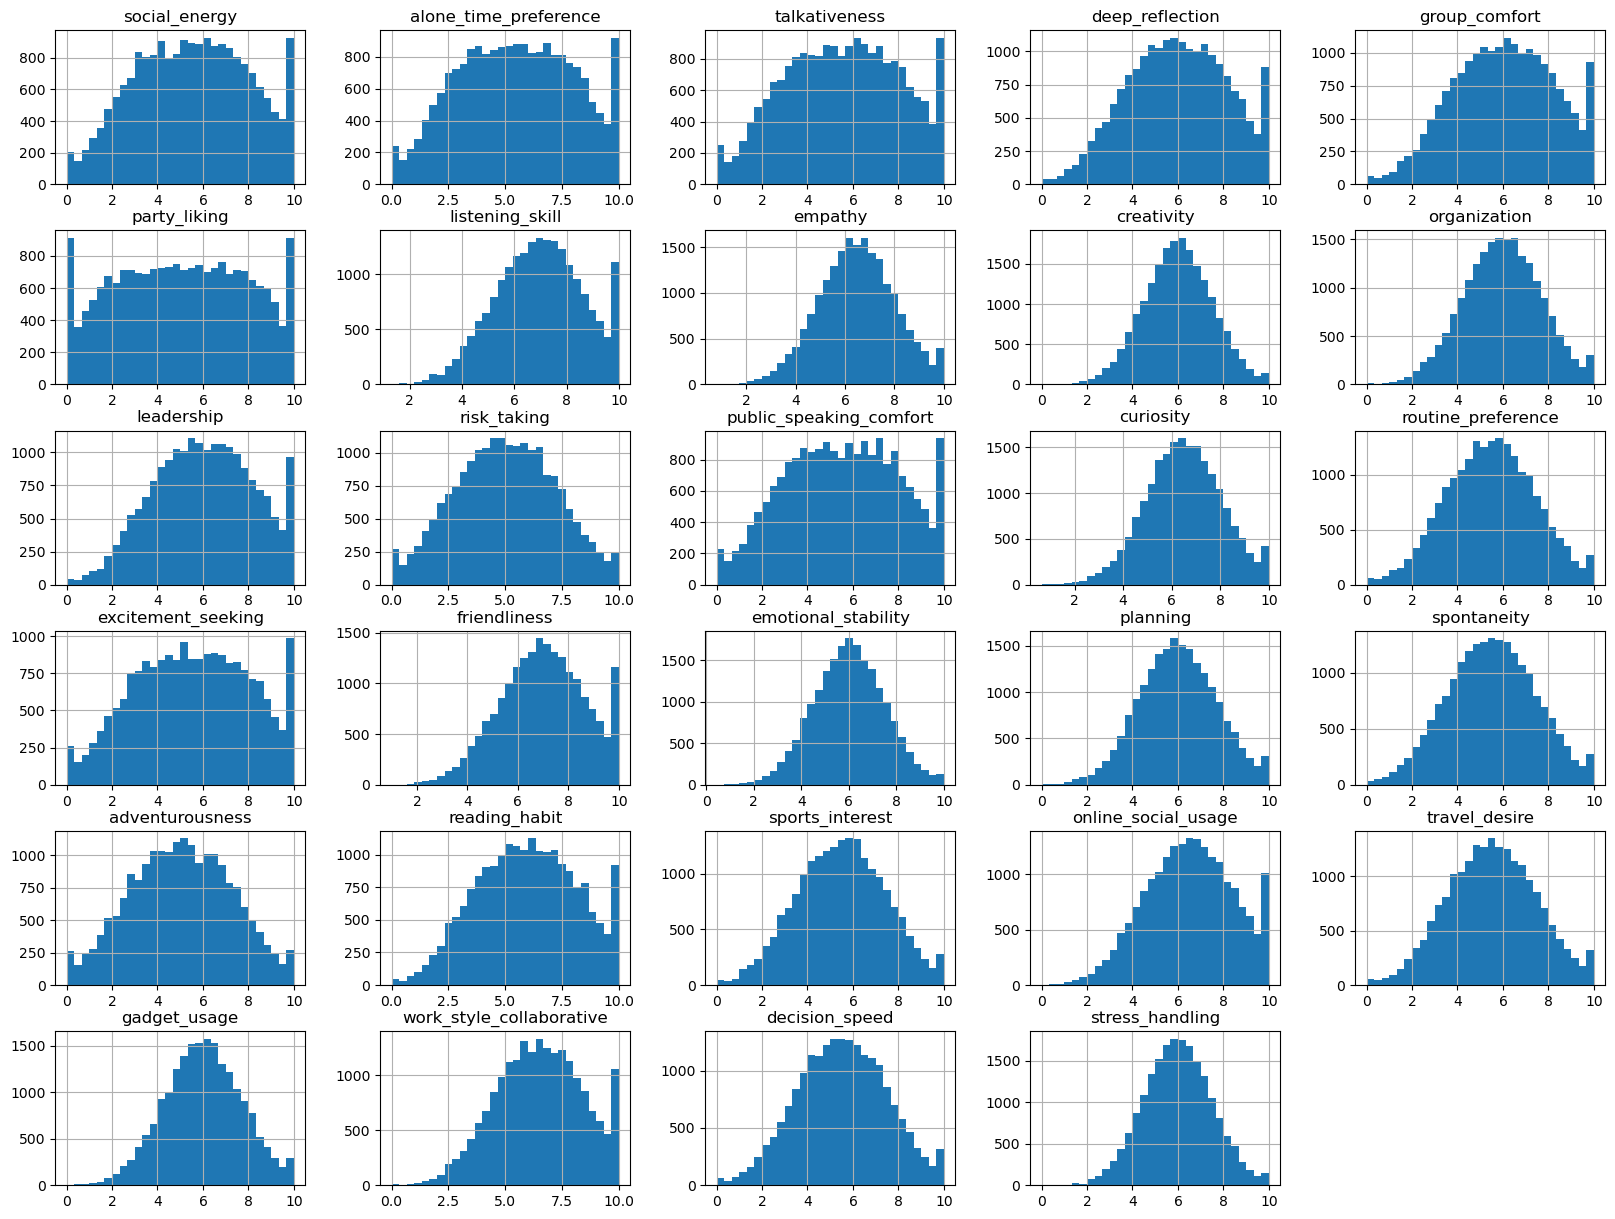

In [8]:
num_features.hist(figsize = (20,15),bins=30)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,x_test,Y_train,y_test = train_test_split(num_features,cate_features,test_size=0.3,random_state = 42) 

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 80)

In [35]:
random_forest_model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=80)

In [36]:
random_forest_prediction = random_forest_model.predict(x_test)
random_forest_prediction

array(['Ambivert', 'Extrovert', 'Introvert', ..., 'Introvert',
       'Extrovert', 'Ambivert'], dtype=object)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
random_forest_acc = accuracy_score(y_test, random_forest_prediction)
random_forest_acc

0.9933333333333333

In [39]:
random_forest_con_mat = confusion_matrix(y_test,random_forest_prediction)
random_forest_con_mat

array([[1923,    7,   12],
       [  13, 2090,    0],
       [   8,    0, 1947]], dtype=int64)

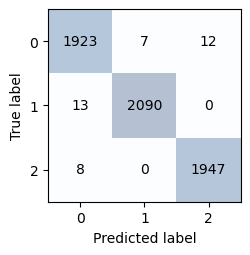

In [40]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(random_forest_con_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(random_forest_con_mat.shape[0]):
    for j in range(random_forest_con_mat.shape[1]):
        ax.text(x=j, y=i, s=random_forest_con_mat[i, j],va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [43]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

In [46]:
svm_clasiifier = Pipeline((
    ("Scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss = "hinge",max_iter=1100)),
))

In [47]:
svm_clasiifier.fit(X_train,Y_train)

C:\Users\wwwgu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=1100))])

In [49]:
predict_svm = svm_clasiifier.predict(x_test)
predict_svm

array(['Ambivert', 'Extrovert', 'Introvert', ..., 'Introvert',
       'Extrovert', 'Ambivert'], dtype=object)

In [51]:
linear_svm_acc = accuracy_score(y_test, predict_svm)
linear_svm_acc

0.9931666666666666

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_svm_clf = Pipeline((
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
))

In [53]:
poly_svm_clf.fit(X_train,Y_train)

C:\Users\wwwgu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [54]:
predict_poly_svm = poly_svm_clf.predict(x_test)
predict_poly_svm

array(['Ambivert', 'Extrovert', 'Introvert', ..., 'Introvert',
       'Extrovert', 'Ambivert'], dtype=object)

In [55]:
poly_svm_acc = accuracy_score(y_test,predict_poly_svm)
poly_svm_acc

0.9963333333333333

In [56]:
from sklearn.tree import DecisionTreeClassifier 

In [69]:
tree_clf= DecisionTreeClassifier(max_depth=30)
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=30)

In [70]:
predict_decision_tree = tree_clf.predict(x_test)
predict_decision_tree

array(['Ambivert', 'Extrovert', 'Introvert', ..., 'Introvert',
       'Extrovert', 'Ambivert'], dtype=object)

In [71]:
decision_tree_acc = accuracy_score(y_test,predict_decision_tree)
decision_tree_acc

0.9395